#**Part 1: Data Preprocessing**

**1. Load the Dataset**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

df = pd.read_csv("/content/Netflix_Userbase.csv")
print(df.head())

   User ID Subscription Type  Monthly Revenue Join Date Last Payment Date  \
0        1             Basic               10  15-01-22          10-06-23   
1        2           Premium               15  05-09-21          22-06-23   
2        3          Standard               12  28-02-23          27-06-23   
3        4          Standard               12  10-07-22          26-06-23   
4        5             Basic               10  01-05-23          28-06-23   

          Country  Age  Gender      Device Plan Duration  
0   United States   28    Male  Smartphone       1 Month  
1          Canada   35  Female      Tablet       1 Month  
2  United Kingdom   42    Male    Smart TV       1 Month  
3       Australia   51  Female      Laptop       1 Month  
4         Germany   33    Male  Smartphone       1 Month  


**2. Missing Values**

In [ ]:
print(df.isnull().sum())

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64


**3. Encode Categorical Variables**

In [ ]:
df_encoded=pd.get_dummies(df, columns=['Subscription Type', 'Country', 'Gender', 'Device', 'Plan Duration'])
print(df_encoded)

      User ID  Monthly Revenue Join Date Last Payment Date  Age  \
0           1               10  15-01-22          10-06-23   28   
1           2               15  05-09-21          22-06-23   35   
2           3               12  28-02-23          27-06-23   42   
3           4               12  10-07-22          26-06-23   51   
4           5               10  01-05-23          28-06-23   33   
...       ...              ...       ...               ...  ...   
2495     2496               14  25-07-22          12-07-23   28   
2496     2497               15  04-08-22          14-07-23   33   
2497     2498               12  09-08-22          15-07-23   38   
2498     2499               13  12-08-22          12-07-23   48   
2499     2500               15  13-08-22          12-07-23   35   

      Subscription Type_Basic  Subscription Type_Premium  \
0                           1                          0   
1                           0                          1   
2              

**4. Feature Selection**

In [ ]:
df_dummies = pd.get_dummies(df, drop_first=True)
df_dummies['req_monthly_revenue'] = (df['Monthly Revenue']>10).astype(int)

x = df_dummies.drop(['Monthly Revenue', 'Age'],axis=1)
y = df_dummies['req_monthly_revenue']

#**Part 2: Exploratory Data Analysis (EDA)**

**1. Descriptive Statistics**

In [ ]:
df.describe()

,User ID,Monthly Revenue,Age
count,2500.00000,2500.000000,2500.000000
mean,1250.50000,12.508400,38.795600
std,721.83216,1.686851,7.171778
min,1.00000,10.000000,26.000000
25%,625.75000,11.000000,32.000000
50%,1250.50000,12.000000,39.000000
75%,1875.25000,14.000000,45.000000
max,2500.00000,15.000000,51.000000


**2. Visualizations**

* Distribution of Monthly Revenue

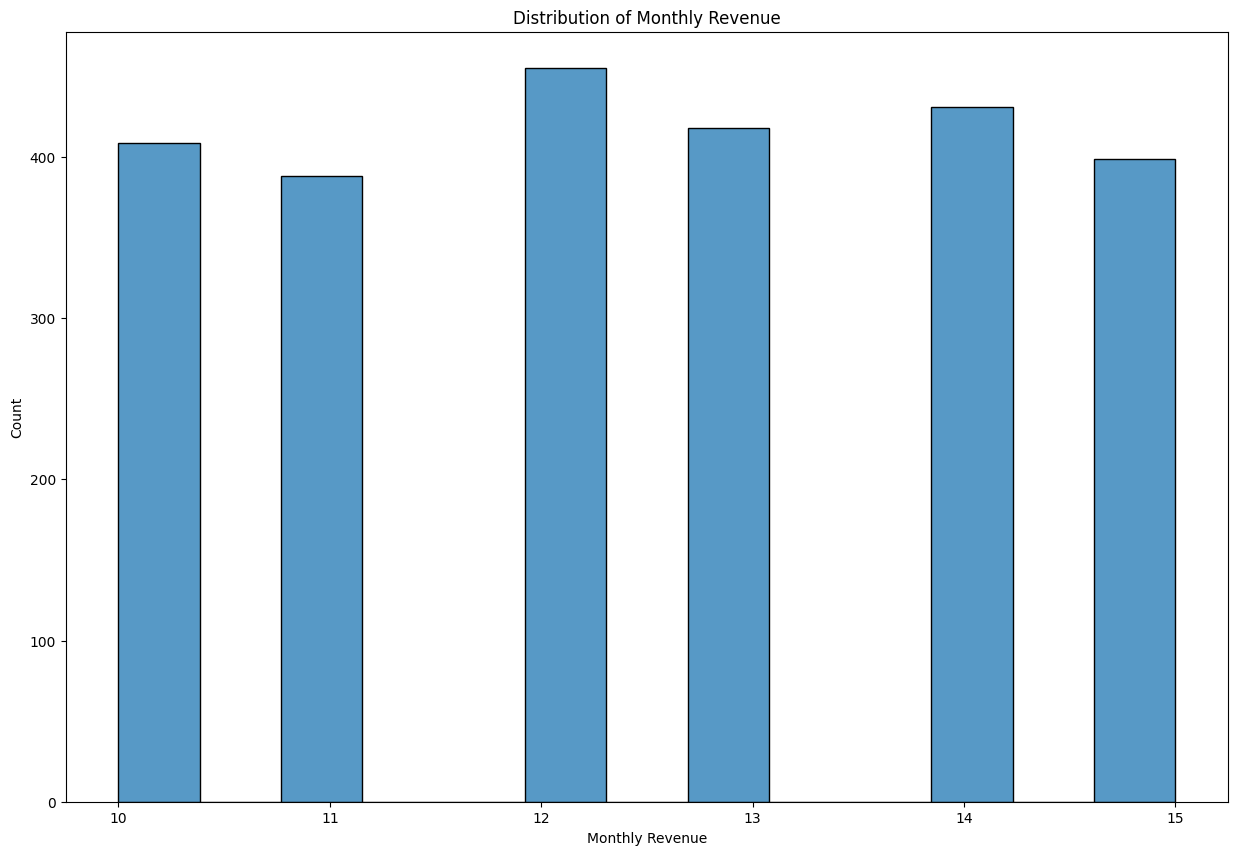

In [ ]:
plt.figure(figsize=(15, 10))
plt.title("Distribution of Monthly Revenue")
sns.histplot(x="Monthly Revenue", data=df)
plt.show()

* **User Demographics**

In [ ]:
country_counts = df['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'User Count']

fig = px.choropleth(country_counts, locations='Country', locationmode='country names',
                    color='User Count', hover_name='Country',
                    title=' User Demographics',
                    color_continuous_scale='Plasma')

fig.show()


#**Part 3: Linear Regression Model (Predicting Monthly Revenue)**

**1. Build the Model**

In [ ]:
x = df.drop('Monthly Revenue', axis=1)
y = df[['Monthly Revenue']]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

model = LinearRegression()


Slope:  [-0.0898922]
Intercept:  [39.92000763]


<function matplotlib.pyplot.show(close=None, block=None)>

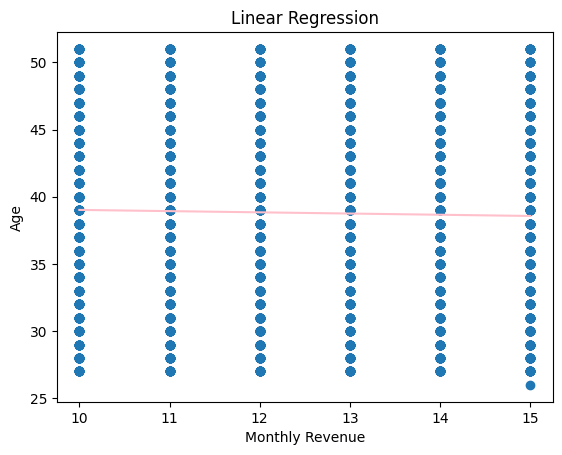

In [ ]:
x = df [['Monthly Revenue']]
y = df [['Age']]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(x,y)

slope = model.coef_[0]
intercept = model.intercept_
print("Slope: ", slope)
print("Intercept: ", intercept)

plt.scatter(x,y)
plt.plot(x,model.predict(x), color='pink')
plt.xlabel('Monthly Revenue')
plt.ylabel('Age')
plt.title('Linear Regression')
plt.show

**2. Model Evaluation**

In [ ]:
linear_reg_model = LinearRegression()
linear_reg_model.fit(x_train, y_train)

LinearRegression()

In [ ]:
revenue_predictions = linear_reg_model.predict(x_test)

mse = mean_squared_error(y_test, revenue_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, revenue_predictions)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared Score:", r2)

Mean Squared Error (MSE): 51.66943035503506
Root Mean Squared Error (RMSE): 7.18814512618068
R-squared Score: -0.003937186123555536


#**Part 4: Logistic Regression Model (Predicting Customer Feedback)**

**1. Model Building**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

scaler=StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

model = LogisticRegression()
model.fit(x_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LogisticRegression()

**2. Evaluation**

In [ ]:
y_pred = model.predict(x_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix: ")
print(conf_matrix)
print("Classification Report: ")
print(class_report)

Accuracy: 0.036
Confusion Matrix: 
[[ 0  0  0  8  1  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  6  0  0
   0]
 [ 0  0  0 13  4  0  0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  8  0  0
   0]
 [ 0  0  0  9  2  0  0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  3  0  0
   0]
 [ 0  0  0  9  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  4  0  0
   0]
 [ 0  0  0  9  4  0  0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  3  0  0
   0]
 [ 0  0  0  6  5  0  0  0  0  0  0  0  6  0  0  0  0  0  0  0  0  4  0  0
   0]
 [ 0  0  0 12  0  0  0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  5  0  0
   0]
 [ 0  0  0 10  2  0  0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  4  0  0
   0]
 [ 0  0  0  5  4  0  0  0  0  0  0  0  4  0  0  0  0  0  0  0  0  2  0  0
   0]
 [ 0  0  0  8  6  0  0  0  0  0  0  0  6  0  0  0  0  0  0  0  0  3  0  0
   0]
 [ 0  0  0 13  4  0  0  0  0  0  0  0  7  0  0  0  0  0  0  0  0  6  0  0
   0]
 [ 0  0  0 11  2  0  0  0  0  0  0  0  4  0  0  0  0  0  0  0  0  2  0  0
   0]
 [ 0 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



#**Part 5: Comparative Analysis and Visualization**

**1. Feature Importance**

In linear regression, feature significance is determined by the slope (coefficient) and intercept values, where a higher absolute slope indicates a stronger impact of the feature on the target variable, and the intercept represents the predicted target value when all features are zero. Meanwhile, the logistic regression, feature significance is evaluated through scaled coefficients, with positive coefficients indicating a positive impact on the binary target variable and negative coefficients suggesting a negative impact; larger absolute coefficients signify greater influence on the classification outcome. Overall, both regression models prioritize features with larger coefficients or slopes, indicating their greater importance in predicting the target variable or classification outcome.

**2. Insights**

The linear regression model suggests that Age has a significant influence on Monthly Revenue, with a positive slope indicating that higher Age is associated with increased Revenue. The intercept represents the Revenue when Age is zero. In contrast, the logistic regression model highlights how various factors, after scaling, affect the likelihood of specific outcomes related to Revenue. Positive coefficients in logistic regression indicate factors that increase Revenue, while negative coefficients suggest factors that decrease it, offering valuable insights for optimizing strategies and decision-making to enhance Revenue.